# PROJECT 5. Spectrogram classification 모델 구현
> 2차원  Spectrogram 데이터를 입력받아 text라벨을 출력하는 모델 구현하기
<br/>

## 1) 데이터 전처리
### (1) Spectrogram 
현재 데이터 셋은 1차원의 음성 데이터 입니다. 더 좋은 성능을 위해서 1차원의 음성 데이터를 **2차원의 Spectrogram 데이터로 변환**시키도록 하겠습니다.  
> **Spectrogram**  
: wav 데이터를 해석하는 방법 중 하나로, 일정 시간동안 wav 데이터 안의 다양한 주파수들이 얼마나 포함되어 있는지를 보여줍니다.  
즉, 시간의 흐름에 따른 frequency 영역별 amplitude를 생성합니다.


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

data_path = os.getenv("HOME") +'/aiffel/exploration/speech_recognition/data/speech_wav_8000.npz'    # 음성 데이터가 있는 경로
speech_data = np.load(data_path)    # 음성 데이터 로드하기

spec_data = list()    # spectrogram 데이터를 저장할 리스트
for wav in speech_data['wav_vals']:    # waveform 데이터 하나씩 
    spec_data.append(np.abs(librosa.stft(wav, n_fft=258)))    # spectrogram 데이터로 변환하기
spec_data = np.array(spec_data)    # 데이터 타입을 넘파이로 변환하기


### (2) 데이터셋 살펴보기
> **데이터 셋** 파일은 "speech_wav_8000.npz" 로, **1초의 길이를 가지는 음성 데이터와 라벨**로 이루어져있습니다.  
**음성 데이터는 50620개**이며, **라벨은 12개**('yes','no','up','down','left','right','on','off','stop','go', 'unknown','slience')입니다.  
음성은 1초에 1000번 진동을 하며, 1초를 재생하는데 필요한 샘플 수는 8000개 입니다.  
즉, **frequency는 1000Hz**이고 **sample rate는 8000Hz** 입니다. 그리고 모든 **샘플은 -1 ~ 1사이의 값**을 가집니다.
- **wavefrom's shape : (8000, ) - 1 dimension**
- **spectrogram's shape : (130, 126) - 2 dimension**

========================== 전반적인 데이터 내용 ==========================
음성 데이터의 갯수 : 50620개
라벨 데이터(12개) : ['down' 'go' 'left' 'no' 'off' 'on' 'right' 'silence' 'stop' 'unknown'
 'up' 'yes']
========================== 세부적인 데이터 내용 ==========================
1번째 음성 데이터의 waveform 길이 : (8000,) 개
1번째 음성 데이터의 waveform 값 : [-1.27418665e-04 -1.12644804e-04 -1.86756923e-04 ... -1.62762426e-05
 -4.93293861e-04 -3.55132594e-04]

1번째 음성 데이터의 spectrogram 길이 : (130, 126) 개
1번째 음성 데이터의 spectrogram 값 : [[8.0723902e-03 5.2032182e-03 3.4693219e-03 ... 1.8922662e-02
  3.3809434e-04 1.0142580e-02]
 [6.5486785e-03 3.2852096e-03 2.2495915e-03 ... 2.5527487e-02
  1.6525777e-02 3.2326202e-03]
 [2.4226354e-03 3.5080472e-03 2.4726372e-03 ... 2.7952474e-02
  2.6693283e-02 1.7628349e-02]
 ...
 [5.8292970e-04 2.9035914e-04 1.4131786e-05 ... 6.0245253e-05
  3.1307511e-04 5.0933618e-04]
 [5.2434229e-04 2.5860392e-04 1.2995474e-05 ... 2.1275569e-05
  2.2292971e-04 4.7651122e-04]
 [5.1448052e-04 2.5908535e-04 1.6500426e-06 .

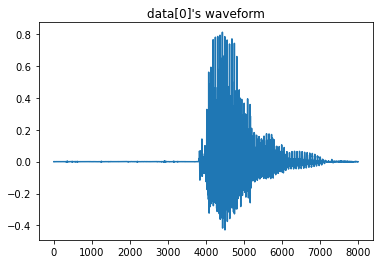

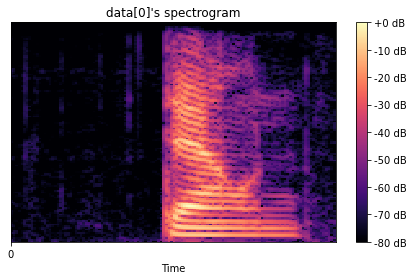

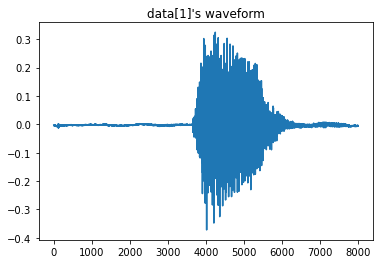

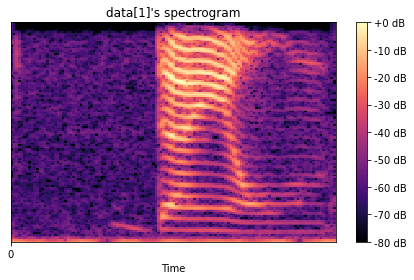

========================== 'off' 그래프 ==========================


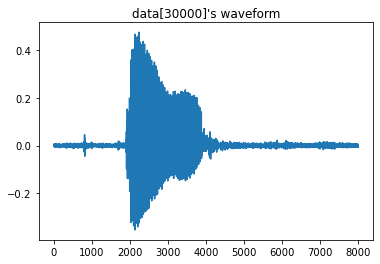

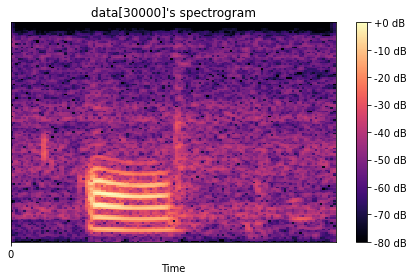

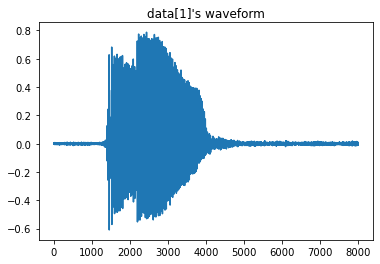

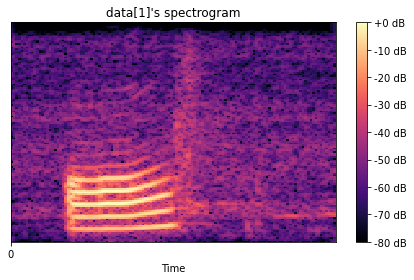

In [2]:
import librosa.display

# 데이터 셋 살펴보기
print("========================== 전반적인 데이터 내용 ==========================")
print(f"음성 데이터의 갯수 : {len(speech_data['wav_vals'])}개")
print(f"라벨 데이터({len(np.unique(speech_data['label_vals']))}개) : {np.unique(speech_data['label_vals'])}")

print("========================== 세부적인 데이터 내용 ==========================")
print(f"1번째 음성 데이터의 waveform 길이 : {speech_data['wav_vals'][0].shape} 개")
print(f"1번째 음성 데이터의 waveform 값 : {speech_data['wav_vals'][0]}")
print()
print(f"1번째 음성 데이터의 spectrogram 길이 : {spec_data[0].shape} 개")
print(f"1번째 음성 데이터의 spectrogram 값 : {spec_data[0]}")
print()
print(f"1번째 음성 데이터의 label 값 : {speech_data['label_vals'][0]}")
print()

print("========================== 'down' 그래프 ==========================")
# 0 번째
fig = plt.figure()

plt.plot(speech_data["wav_vals"][0])
plt.title("data[0]'s waveform")
plt.show()

librosa.display.specshow(librosa.amplitude_to_db(spec_data[0], ref=np.max), x_axis='time')
plt.title("data[0]'s spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

ipd.display(ipd.Audio(speech_data["wav_vals"][0], rate=8000))

# 1번째
fig = plt.figure()

plt.plot(speech_data["wav_vals"][1])
plt.title("data[1]'s waveform")
plt.show()

librosa.display.specshow(librosa.amplitude_to_db(spec_data[1], ref=np.max), x_axis='time')
plt.title("data[1]'s spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

ipd.display(ipd.Audio(speech_data["wav_vals"][1], rate=8000))

print("========================== 'off' 그래프 ==========================")
# 30000 번째
fig = plt.figure()

plt.plot(speech_data["wav_vals"][30000])
plt.title("data[30000]'s waveform")
plt.show()

librosa.display.specshow(librosa.amplitude_to_db(spec_data[30000], ref=np.max), x_axis='time')
plt.title("data[30000]'s spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

ipd.display(ipd.Audio(speech_data["wav_vals"][30000], rate=8000))

# 30001번째
fig = plt.figure()

plt.plot(speech_data["wav_vals"][30001])
plt.title("data[1]'s waveform")
plt.show()

librosa.display.specshow(librosa.amplitude_to_db(spec_data[30001], ref=np.max), x_axis='time')
plt.title("data[1]'s spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

ipd.display(ipd.Audio(speech_data["wav_vals"][30001], rate=8000))

위 출력결과를 보면, 목소리는 다르지만 라벨이 같은 데이터인 "down"과 "off"가 각각 2개씩 있습니다. 
같은 라벨의 그래프를 확인해 보면, waveform 그래프보다 spectrogram 그래프가 더 비슷한 것을 확인할 수 있습니다.

### (2) 라벨 데이터 처리하기
> 현재 **정답 데이터(라벨 데이터)** 는 **Text 형태** 로 이루어져 있습니다.  
학습을 위해서 Text 데이터를 **숫자** 로 바꿔야 합니다. 정답 데이터를 index 형태로 바꿔주는 작업을 하도록 하겠습니다.

In [3]:
label_value = dict()

# 라벨의 딕셔너리 만들기
for i, l in enumerate(np.unique(speech_data['label_vals'])):
    label_value[l] = i
    
print('LABEL : ', np.unique(speech_data['label_vals']))
print()
print('Indexed LABEL : ', label_value)
print()

# 딕셔너리로 정답 데이터 숫자로 바꾸기
temp = []
for v in speech_data["label_vals"]:
    temp.append(label_value[v[0]])
label_data = np.array(temp)

print("LABEL data :", label_data)

LABEL :  ['down' 'go' 'left' 'no' 'off' 'on' 'right' 'silence' 'stop' 'unknown'
 'up' 'yes']

Indexed LABEL :  {'down': 0, 'go': 1, 'left': 2, 'no': 3, 'off': 4, 'on': 5, 'right': 6, 'silence': 7, 'stop': 8, 'unknown': 9, 'up': 10, 'yes': 11}

LABEL data : [0 0 0 ... 7 7 7]


### (3) train 데이터, test 데이터 분리하기 
> sklearn의 **train_test_split** 함수를 이용해 train 데이터와 test 데이터를 분리하겠습니다.

In [4]:
from sklearn.model_selection import train_test_split
import librosa

train_wav, test_wav, train_label, test_label = train_test_split(spec_data, 
                                                                label_data, 
                                                                test_size=0.1,
                                                                shuffle=True)
print("train data : ", train_wav.shape)
print("train labels : ", train_label.shape)
print("test data : ", test_wav.shape)
print("test labels : ", test_label.shape)

sr = train_wav.shape[1]
sc = train_wav.shape[2]

train_wav = train_wav.reshape([-1, sr, sc, 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, sr, sc, 1])


train data :  (45558, 130, 126)
train labels :  (45558,)
test data :  (5062, 130, 126)
test labels :  (5062,)


### (4) 하이퍼파라미터 설정하기
> 하이퍼 파라미터란 모델을 학습할 때, 외적인 요소로 학습에 영향을 미치는 파라미터들입니다.  
대표적인 하이퍼 파라미터인 **배치크기** 와 **에포크** 를 설정할 것입니다.  
배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말하고, 에포크는 학습하는 횟수를 말합니다.

In [5]:
batch_size = 32
max_epochs = 10

# 모델 경로 저장
checkpoint_dir = os.getenv('HOME')+'/aiffel/exploration/speech_recognition/models/wav_skip'
print(checkpoint_dir)

/home/aiffel-dj41/aiffel/exploration/speech_recognition/models/wav_skip


### (5) 데이터 셋 구성하기
> tf.data.dataset을 이용하여 데이터 셋을 구성하도록 하겠습니다.  
    

In [6]:
import tensorflow as tf

def one_hot_label(wav, label):
    label = tf.one_hot(label, depth=12)
    return wav, label

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_wav, train_label))  # 텐서 생성
print(train_dataset)
print()
train_dataset = train_dataset.map(one_hot_label)    # 데이셋의 모든 원소에 one_hot_label 함수로 지정한 변화을 한다.
print(train_dataset)
print()
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)    # 배치크기만큼 원소를 가져와서 데이터 셋에 저장한다.
print(train_dataset)
print()

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_wav, test_label))    # 텐서 데이터
test_dataset = test_dataset.map(one_hot_label)    # 맵 데이터
test_dataset = test_dataset.batch(batch_size=batch_size)    # 배치 데이터


<TensorSliceDataset shapes: ((130, 126, 1), ()), types: (tf.float32, tf.int64)>

<MapDataset shapes: ((130, 126, 1), (12,)), types: (tf.float32, tf.float32)>

<BatchDataset shapes: ((None, 130, 126, 1), (None, 12)), types: (tf.float32, tf.float32)>



**※ 모델링 작업에서 메모리 부족 현상을 겪게 될 수도 있기 때문에 wav 데이터와 spectrogram 데이터를 담아둔 메모리 버퍼를 비워주도록 하겠습니다.**

In [7]:
del speech_data
del spec_data

## 2) 모델링
### (1) **모델 구현하기**  
> **spectogram 데이터**는 **2차원 데이터**이기 때문에 데이터 형식에 맞도록 모델을 구성해야합니다.  
**Conv2D layer** 를 이용해서 모델을 구성해보겠습니다.

In [8]:
from tensorflow.keras import layers

input_tensor = layers.Input(shape=(sr, sc, 1))

x = layers.Conv2D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv2D(32, 9, padding='same', activation='relu')(x)
skip_1 = layers.MaxPool2D()(x)

x = layers.Conv2D(64, 9, padding='same', activation='relu')(skip_1)
x = layers.Conv2D(64, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_1], -1)
skip_2 = layers.MaxPool2D()(x)

x = layers.Conv2D(128, 9, padding='same', activation='relu')(skip_2)
x = layers.Conv2D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(128, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_2], -1)
skip_3 = layers.MaxPool2D()(x)

x = layers.Conv2D(256, 9, padding='same', activation='relu')(skip_3)
x = layers.Conv2D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv2D(256, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_3], -1)
x = layers.MaxPool2D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav = tf.keras.Model(input_tensor, output_tensor)

model_wav.summary()

optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=optimizer,
             metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 130, 126, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 130, 126, 32) 2624        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 130, 126, 32) 82976       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 65, 63, 32)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

### (2) 학습하기
> model.fit 함수를 사용하여 학습을 합니다.  
fit 함수를 이용할 때, callback 함수를 이용해서 학습 중간 중간 원하는 동작을 하도록 설정했습니다.

In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

#30분 내외 소요 (메모리 사용량에 주의해 주세요.)
history_wav = model_wav.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_wav) // batch_size,
                    validation_data=test_dataset,
                    validation_steps=len(test_wav) // batch_size,
                    callbacks=[cp_callback])

Epoch 1/10
1423/1423 [==============================] - ETA: 0s - loss: 0.7378 - accuracy: 0.7625
Epoch 00001: val_loss improved from inf to 0.30859, saving model to /home/aiffel-dj41/aiffel/exploration/speech_recognition/models/wav_skip
1423/1423 [==============================] - 212s 149ms/step - loss: 0.7378 - accuracy: 0.7625 - val_loss: 0.3086 - val_accuracy: 0.9031
Epoch 2/10
1423/1423 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9325
Epoch 00002: val_loss improved from 0.30859 to 0.15691, saving model to /home/aiffel-dj41/aiffel/exploration/speech_recognition/models/wav_skip
1423/1423 [==============================] - 215s 151ms/step - loss: 0.2177 - accuracy: 0.9325 - val_loss: 0.1569 - val_accuracy: 0.9468
Epoch 3/10
1423/1423 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9546
Epoch 00003: val_loss improved from 0.15691 to 0.14351, saving model to /home/aiffel-dj41/aiffel/exploration/speech_recognition/models/wav_skip
1423

### (3) 학습 결과 그래프로 보기
> model.fit 함수는 학습 동안의 결과를 return 합니다.  
return 값을 기반으로 loss와 accuracy를 그래프로 표현하겠습니다.  
train loss와 val loss의 차이가 커지는 경우 오버피팅이 일어나는 것이기 때문에 이를 수정할 필요가 있습니다.

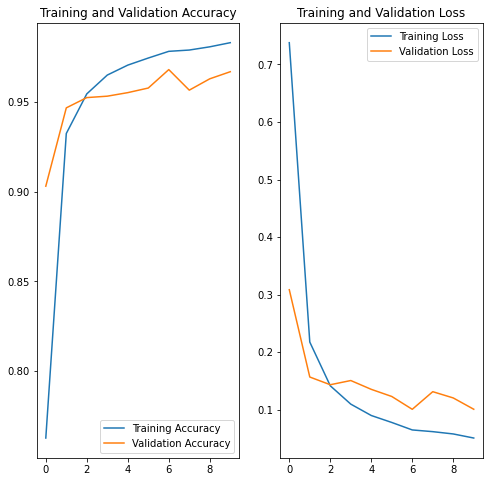

In [10]:
import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss=history_wav.history['loss']
val_loss=history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### (4) 평가하기
> test dataset을 이용해서 모델의 성능을 평가합니다.

In [11]:
model_wav.load_weights(checkpoint_dir)
results = model_wav.evaluate(test_dataset)

# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))


159/159 [==============================] - 27s 172ms/step - loss: 0.1012 - accuracy: 0.9680
loss value: 0.101
accuracy value: 96.7997%


## 3) 결과 및 루브릭
wavrform 데이터를 spectrogram 데이터로 변환하여 학습한 결과, 정확도가 96%가 나왔습니다. 아주 높은 정확도를 달성했습니다.

> **[평가문항]**
> 1. **음성데이터를 2차원 Spectrogram 으로 변환하여 데이터셋을 구성하였다.**  
: waveform 데이터를 spectrogram으로 변환하여 데이터 셋을 구성하였습니다.  
&nbsp;&nbsp;그리고 시각화 및 train/test 데이터 셋 구성을 정상적으로 수행했습니다. :)
> 2. **1, 2차원 데이터를 처리하는 음성인식 모델이 정상 작동한다.**  
: 2차원 데이터를 처리하는 음성인식 모델(Conv2D)을 구현하였고, 정상적으로 작동했습니다. :)
> 3. **테스트 셋 수행결과 음성인식 모델의 Accuracy가 일정 수준에 도달하였다.**  
: evaluation 결과 96%의 정확도를 달성했습니다.

## 4) 느낀점
프로젝트는 2차원 데이터를 입력으로 받는 딥러닝 모델을 구현하는 것 빼고는 전체적으로 (팀원들이 도와준 덕분에) 많이 어렵지 않았지만,  
음성분야의 개념들이 개념을 이해하는데 힘들었습니다. 사실 이해를 다 하지 못했습니다.  
특히, 표본화, 양자화, 부호화, 푸리에변환에 대해 정확하게 이해하지 못했습니다.  
나중에 시간이 된다면, 그 부분에 대해서 더 깊이 공부해 봐야할 것 같습니다.

> **waveform 데이터는 1차원이다. waveform 데이터를 2차원인 spectrogram 으로 변환해서 학습시키면 성능이 더 좋아진다! :)** 

> **아날로그 신호와 디지털 신호간의 변환 과정과 푸리에 변환에 대해서 더 공부해보자! :)**
